In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import SimpleITK as sitk
from myshow import myshow, myshow3d

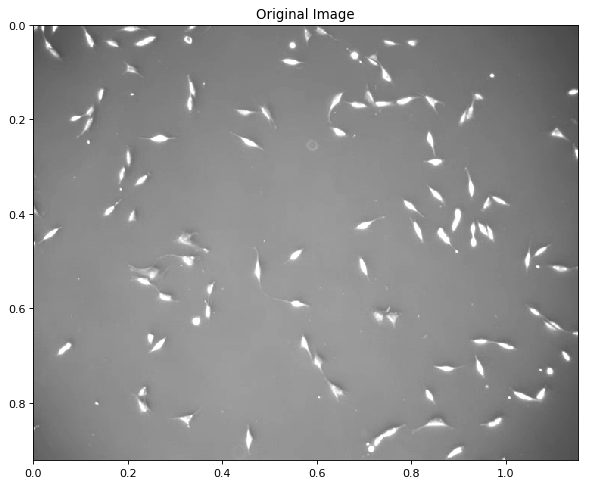

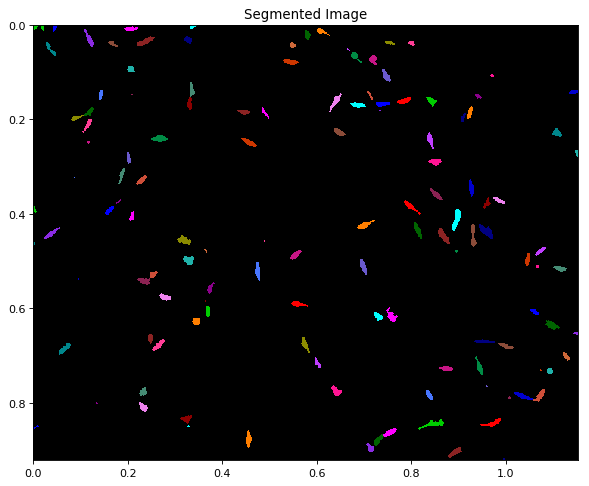

In [57]:
#get image
image_directory = os.path.join(".", "Images")
#img = sitk.ReadImage(os.path.join(image_directory, "t009_N2DH_GOWT1.tif")) #sigma, level = 0.00056, 875
#img = sitk.ReadImage(os.path.join(image_directory, "t035_N2DL_HeLa.tif")) #sigma, level = 0.00055, 10000
img = sitk.ReadImage(os.path.join(image_directory, "t067_PhC-C2DL-PSC.tif")) #sigma, level = 0.0001, 5700

#set watershed parameters
#the first settings below are for resized images that are 3x smaller than the originals, set accordingly
#sigma, level = 0.00001, 10000
sigma, level = 0.0001, 5700

#if using on 3x small resized images, use "grayed" images
if sigma == 0.00001:
    img = sitk.VectorIndexSelectionCast(img,1)

#get feature edge highlighted image
feature_img = sitk.GradientMagnitudeRecursiveGaussian(img, sigma=sigma)

#get watershed on edge highlighted image
ws_img = sitk.MorphologicalWatershed(feature_img, level=level, markWatershedLine=False, fullyConnected=False)

#get connected component of watershed, excluding background pixels
ws_size = np.shape(sitk.GetArrayFromImage(ws_img))
seg = sitk.ConnectedComponent(ws_img!=ws_img[ws_size[1] - 1, ws_size[0] - 1])

#get overlay of original image with connected component
foreground = sitk.LabelOverlay(img, seg)

#get inside distance map
filled = sitk.BinaryFillhole(seg!=0)
d = sitk.SignedMaurerDistanceMap(filled, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)

#get watershed of inside distance map
ws = sitk.MorphologicalWatershed( d, markWatershedLine=False, level=1)

#get split objects
ws = sitk.Mask( ws, sitk.Cast(seg, ws.GetPixelID()))

#get overlay of original image and split objects (output image)
output = sitk.LabelToRGB(ws)

myshow(img, "Original Image")
myshow(output, "Segmented Image")